Q1. For a matrix multiplication between a (n, k) and (k, m) matrix. The number of multiplications are (k * n * m) while the number of additions are ((k-1) * n * m). This could be understood in the following manner:

\\
Let us assume the below (n,k) matrix called M1:

\begin{matrix}
a_1 & a_2 & a_3 & . & . & a_k \\
b_1 & b_2 & b_3 & . & . & b_k \\
c_1 & c_2 & c_3 & . & . & c_k \\
.   & .   & . & . & . & . \\
n_1   & n_2   & n_3 & . & . & n_k \\
\end{matrix}



And the below (k,m) matrix called M2:
\begin{matrix}
A_1 & A_2 & A_3 & . & . & A_M \\
B_1 & B_2 & B_3 & . & . & B_M \\
C_1 & C_2 & C_3 & . & . & C_M \\
.   & .   & . & . & . & . \\
K_1   & K_2   & K_3 & . & . & K_M \\
\end{matrix}

\\
For the matrix multiplication, the folllowing operations will be performed

\\

\begin{matrix}
a_1*A_1 + a_2*B_1 + a_3*C_1 ..... + a_k*K_1 & a_1*A_2 + a_2*B_2 + a_3*C_2 .....+ a_k*K_2 & . &. &.&a_1*A_m + a_2*B_m + a_3*C_m .....+ a_k*K_m\\
. & . & . & . & . & . \\
. & . & . & . & . & . \\
.   & .   & . & . & . & . \\
n_1*A_1 + n_2*B_1 + n_3*C_1 ..... + n_k*K_1   & .   & . & . & . & n_1*A_m + n_2*B_m + n_3*C_m ..... + n_k*K_m \\
\end{matrix}

\\

For the above matrix multiplication one can clearly see that for each element of the resultant matrix of size(n,m) having n * m elements and to compute each element k elements will be multiplied with each other and these products will then be added. Thus, for each element there would be k multiplications and (k-1) additions. Since, there are a total of n*m elements in the resultant matrix. Hence, the total additions would be, (k-1) * n * m while the total multiplications would be k * n *m.



**Q2. a) Matrix multiplication using nested loops and list of lists**

In [44]:
import numpy as np

print("Matrix multiplication of array A and B")

A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,12,13],[5,8,2],[9,10,7]]
print()
print("array A is: ",A)
print()
print("array B is: ",B)
C = np.zeros((3,3))

for i in range(3):
   for j in range(3):
       for k in range(3):
           C[i][j] += A[i][k] * B[k][j]
print()
print("The resultant matrix is: ",C)



Matrix multiplication of array A and B

array A is:  [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

array B is:  [[11, 12, 13], [5, 8, 2], [9, 10, 7]]

The resultant matrix is:  [[ 48.  58.  38.]
 [123. 148. 104.]
 [198. 238. 170.]]


**Q2. b) Matrix multiplication using numpy**

In [45]:
C = np.dot(A,B)
print("The resultant matrix is: ",C)

The resultant matrix is:  [[ 48  58  38]
 [123 148 104]
 [198 238 170]]


**Q2. c) Finding the time taken for both the solutions**


In [46]:
%%timeit
import numpy as np

A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,12,13],[5,8,2],[9,10,7]]
C = np.zeros((3,3))

for i in range(3):
   # iterate through columns of Y
   for j in range(3):
       # iterate through rows of Y
       for k in range(3):
           C[i][j] += A[i][k] * B[k][j]




25.2 µs ± 693 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
%%timeit
import numpy as np
A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,12,13],[5,8,2],[9,10,7]]
C = np.dot(A,B)


11.3 µs ± 362 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
%%timeit
import numpy as np

A = np.random.rand(100,100)
B = np.random.rand(100,100)
C = np.zeros((100,100))

for i in range(100):
   # iterate through columns of Y
   for j in range(100):
       # iterate through rows of Y
       for k in range(100):
           C[i][j] += A[i][k] * B[k][j]




972 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%%timeit
import numpy as np
A = np.random.rand(100,100)
B = np.random.rand(100,100)
C = np.dot(A,B)


680 µs ± 260 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The above computations clearly show that using numpy is a faster solution rather than using lists. This is primarily because lists are stored in non-contiguous memory location and may or may not contain different data type. Due to this it is time consuming for lists to fetch/modify elements as compared to numpy arrays which are stored in contiguous memory locations. This allows one to leverage the locality of reference. Additionally, numpy operations are implemented in C, C++ and Fortran. These languages are traditionally known to have a faster computation time.

**Q3. a) Computing median of the array.** The time complexity of the given approach is O($n^{2}$). The time compexity for finding median can be improved by using a sorting technique like quick sort can reduce the complexity to O(nlog(n).


In [50]:
%%timeit
def kth_ele(A,k):
  B = A.copy()
  while(k+1!=0):
    max = B[0]  
    for x in B: 
      if x > max:
        max = x
    B.remove(max)
    k = k-1

  return max

A= list(np.random.rand(100))
n = len(A)
 
if n % 2 == 0:
    median1 = n//2
    median2 = n//2 - 1
    median = (kth_ele(A,median1) + kth_ele(A,median2))/2
else:
    median = kth_ele(A,n//2)
#print("Median is: " + str(median))



535 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%%timeit
def quick_sort(A):
  if len(A) <= 1:
    return A
  pivot = A[len(A) // 2]
  left = [x for x in A if x < pivot]
  middle = [x for x in A if x == pivot]
  right = [x for x in A if x > pivot]
  return quick_sort(left) + middle + quick_sort(right)

A= list(np.random.rand(100))
n = len(A)
A = quick_sort(A) 

if n % 2 == 0:
    median1 = A[n//2]
    median2 = A[n//2 - 1]
    median = (median1+median2)/2
else:
    median = A[n//2]
#print("Median is: " + str(median))



270 µs ± 9.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
%%timeit
A= list(np.random.rand(100))
np.median(A)

52 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


From the above outputs one can see that the np.median() method is the fastest, followed by the quicksort method followed by the brute force technique



**Q 4-6**
Gradient wrt x: $2xy$ + $y^{3}cos(x)$

Gradient wrt y: $x^{2}$ + $3y^{2}sin(x)$

In [53]:
import jax
import jax.numpy as jnp
from jax import grad

#Defining the function 
def func(x,y):
  return x*x*y + y*y*y*jnp.sin(x)

#Gradient with respect to x
df_dx_jax = grad(func, argnums=0)

#Gradient with respect to y
df_dy_jax = grad(func, argnums=1)

In [54]:
import sympy as sym

x,y = sym.symbols('x y')
f = x*x*y + y*y*y*sym.sin(x)
df_dx_sym = f.diff(x)
df_dy_sym = f.diff(y)

print("Gradient wrt x using sympy:", df_dx_sym)
print("Gradient wrt y using sympy:", df_dy_sym)

Gradient wrt x using sympy: 2*x*y + y**3*cos(x)
Gradient wrt y using sympy: x**2 + 3*y**2*sin(x)


In [55]:
def sympy_grad_x(x,y):
  return 2*x*y + y**3*np.cos(x)

def sympy_grad_y(x,y):
  return x**2 + 3*y**2*np.sin(x)


print("Value using jax:",float(df_dx_jax(1.0,1.0)))
print("Values using sympy:",float(sympy_grad_x(1.0,1.0)))

print("Value using jax:",float(df_dy_jax(1.0,1.0)))
print("Values using sympy:",float(sympy_grad_y(1.0,1.0)))

print("Value using jax:",float(df_dy_jax(1.82,1.96)))
print("Values using sympy:",float(sympy_grad_y(1.82,1.96)))

print("Value using jax:",float(df_dy_jax(0.0,0.0)))
print("Values using sympy:",float(sympy_grad_y(0,0)))

Value using jax: 2.540302276611328
Values using sympy: 2.5403023058681398
Value using jax: 3.5244128704071045
Values using sympy: 3.5244129544236893
Value using jax: 14.481188774108887
Values using sympy: 14.481188888521482
Value using jax: 0.0
Values using sympy: 0.0


**Q7.**

In [56]:
dict1 = {2022:{"Branch 1":{"Roll Number":1 ,"Name": "N","Marks": {"Maths":100,"English":70}},"Branch 2":{}},2023:{"Branch 1":{},"Branch 2":{}},2024:{"Branch 1":{},"Branch 2":{}},2025:{"Branch 1":{},"Branch 2":{}}}

In [57]:
dict1

{2022: {'Branch 1': {'Roll Number': 1,
   'Name': 'N',
   'Marks': {'Maths': 100, 'English': 70}},
  'Branch 2': {}},
 2023: {'Branch 1': {}, 'Branch 2': {}},
 2024: {'Branch 1': {}, 'Branch 2': {}},
 2025: {'Branch 1': {}, 'Branch 2': {}}}

**Q 8.**

In [58]:
class student:
    def __init__(self, Name, Roll_number, Marks):
        self.Name = Name
        self.Roll_number = Roll_number
        self.Marks = Marks

class branch:
    def __init__(self, branch,students):
        self.branch = branch
        self.students = students

class year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

In [59]:
db = [
    year (2022,[
        branch(1,[
            student("N", 1, {"Maths": 100, "English": 70}),
        ]),
        branch(2,[
        ])
    ]),
    year(2023,[
        branch(1,[]),
        branch(2,[])
    ]),
    year(2024,[
        branch(1,[]),
        branch(2,[])
    ]),
    year(2025,[
        branch(1,[]),
        branch(2,[])
    ]),
    
]


**Q 9. Plotting graphs**

In [60]:
import matplotlib.pyplot as plt
import math
x= np.arange(0.5,100.5,0.5)

def fun1(x):
  return x

def fun2(x):
  return x*x

def fun3(x):
  return x*x*x/100

def fun4(x):
  return np.sin(x)

def fun5(x):
  return np.sin(x)/x

def fun6(x):
  return np.log(x)

def fun7(x):
  return np.exp(x) 




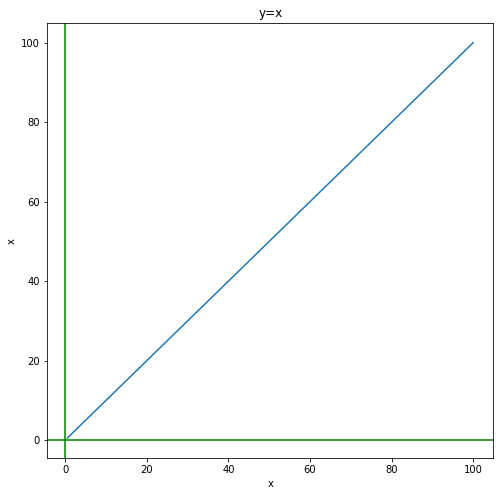

In [61]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
# plotting the points 
plt.plot(x,fun1(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('x')
  
# giving a title to my graph
plt.title('y=x')

# function to show the plot
plt.show()

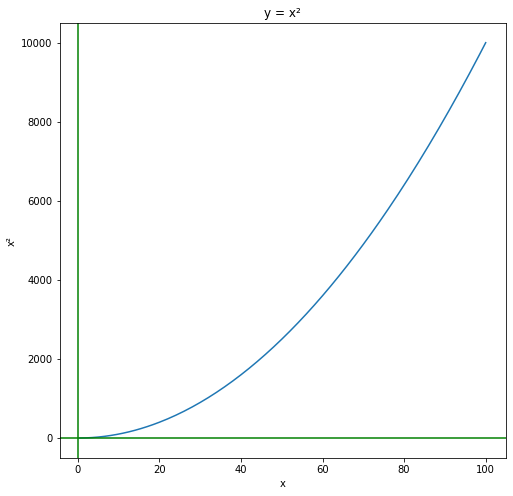

In [62]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
# plotting the points 
plt.plot(x,fun2(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('x\u00b2')
  
# giving a title to my graph
plt.title('y = x\u00b2')

# function to show the plot
plt.show()

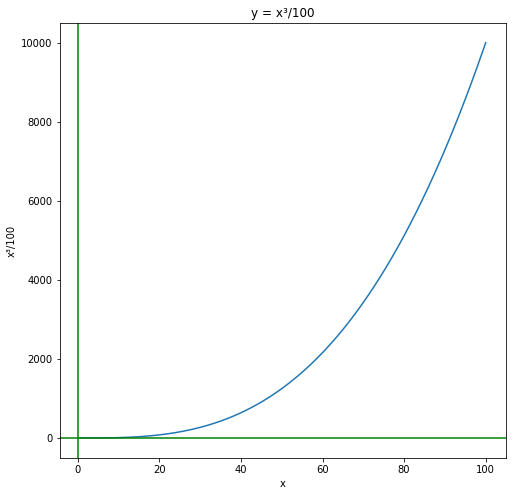

In [63]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
# plotting the points 
plt.plot(x,fun3(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('x\u00b3/100')
  
# giving a title to my graph
plt.title('y = x\u00b3/100')

# function to show the plot
plt.show()

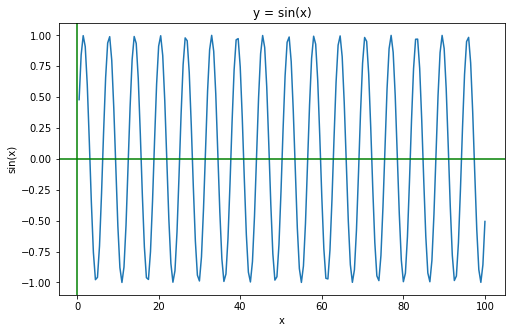

In [64]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
# plotting the points 
plt.plot(x,fun4(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('sin(x)')
  
# giving a title to my graph
plt.title('y = sin(x)')

# function to show the plot
plt.show()

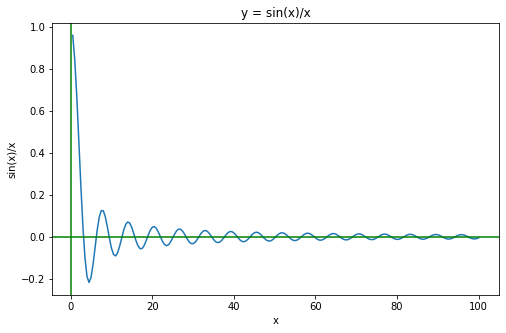

In [73]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
# plotting the points 
plt.plot(x,fun5(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('sin(x)/x')
  
# giving a title to my graph
plt.title('y = sin(x)/x')

# function to show the plot
plt.show()

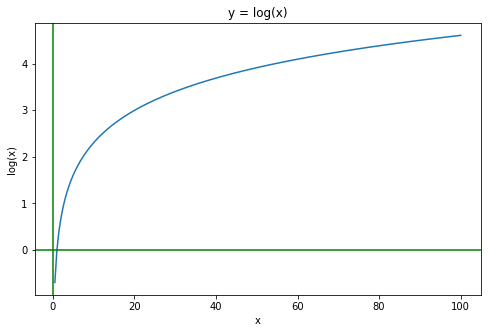

In [66]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
# plotting the points 
plt.plot(x,fun6(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('log(x)')
  
# giving a title to my graph
plt.title('y = log(x)')

# function to show the plot
plt.show()

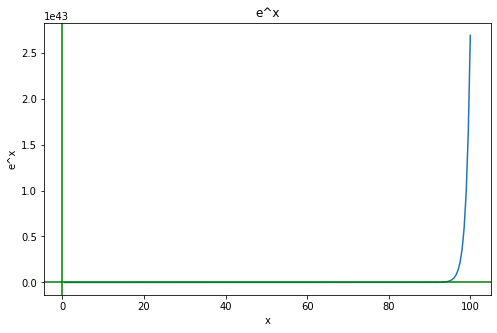

In [67]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
# plotting the points 
plt.plot(x,fun7(x))
plt.axvline(x=0, c="green")
plt.axhline(y=0, c="green")
# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('e^x')
  
# giving a title to my graph
plt.title('e^x')

# function to show the plot
plt.show()

**Q 10. Generating matrix and creating a dataframe**

In [76]:
df

,a,b,c,d,e
0,1.600705,1.593401,1.720843,1.958468,1.386319
1,1.716231,1.636143,1.186127,1.794463,1.478641
2,1.518654,1.628420,1.298742,1.696067,1.865630
3,1.404212,1.658813,1.965174,1.427572,1.040576
4,1.407320,1.894166,1.462153,1.862402,1.049957
5,1.813673,1.160708,1.255013,1.610841,1.724032
6,1.081873,1.249204,1.551376,1.279035,1.507210
7,1.820475,1.633848,1.241810,1.768422,1.665105
8,1.269316,1.013426,1.343787,1.538976,1.420519
9,1.447727,1.678413,1.662893,1.115404,1.190717


In [77]:
import pandas as pd
array = np.random.uniform(low = 1, high=2, size = (20,5))
df = pd.DataFrame(array, columns = ['a','b','c','d','e'])

print(df)

print("The column with the highest standard deviation is: ",df.std(axis=0)[df.std(axis=0) == max(df.std(axis=0))].index.values,"with the value: ",df.std(axis=0)[df.std(axis=0) == max(df.std(axis=0))].values)

print("The row with the lowest mean is: ",df.mean(axis=1)[df.mean(axis=1) == min(df.mean(axis=1))].index.values,"with the value",df.mean(axis=1)[df.mean(axis=1) == min(df.mean(axis=1))].values)

           a         b         c         d         e
0   1.591420  1.438704  1.388554  1.831858  1.440966
1   1.955495  1.610411  1.433681  1.081114  1.198899
2   1.139895  1.863959  1.424655  1.362418  1.222063
3   1.610946  1.865108  1.631811  1.752056  1.164610
4   1.569287  1.084512  1.966432  1.161901  1.691152
5   1.338267  1.064024  1.019435  1.786970  1.913321
6   1.091536  1.959899  1.288717  1.849815  1.399317
7   1.207442  1.427904  1.393002  1.824996  1.681167
8   1.729910  1.788787  1.605227  1.024149  1.339301
9   1.225739  1.068462  1.332728  1.869094  1.376553
10  1.133759  1.659763  1.282266  1.457480  1.086528
11  1.076041  1.257178  1.799465  1.388341  1.037146
12  1.793227  1.846441  1.756046  1.827009  1.443990
13  1.987414  1.039417  1.094755  1.058428  1.287707
14  1.697452  1.163985  1.086869  1.282955  1.520331
15  1.246427  1.847538  1.873404  1.855037  1.187990
16  1.984619  1.126320  1.593814  1.444150  1.125160
17  1.467481  1.654908  1.970419  1.762698  1.

**Q 11.**

In [69]:
df['f'] = df['a']+df['b']+df['c']+df['d']+df['e']
df['g'] = ["LT8" if x<8 else "GT8" for x in df['f']]
print("Rows with sum less than 8 is:",len(df[df['g'] == 'LT8']))
print("Standard deviation of column f where value in column g is LT8", df['f'][df['g']=="LT8"].std())
print("Standard deviation of column f where value in column g is GT8",df['f'][df['g']=="GT8"].std())

Rows with sum less than 8 is: 17
Standard deviation of column f where value in column g is LT8 0.4151996323437205
Standard deviation of column f where value in column g is GT8 0.04939679020171973


**Q 12.** Broadcasting refers to numpy's capability to perform arithemetic operations even if two arrays are of different shapes. The below code lists a few examples for the same.

In [70]:
A =np.array([1,2])
B = np.array([[2,3],[5,7]])
print("Even though array A and B are of different dimensions yet they have been subtracted because A was broadcasted on B, the value is ",A-B)

A =np.random.rand(3)
B = np.random.rand(2,3)
print("Even though array A and B are of different dimensions yet they have been added because A was broadcasted on B, the value is ",A+B)

Even though array A and B are of different dimensions yet they have been subtracted because A was broadcasted on B, the value is  [[-1 -1]
 [-4 -5]]
Even though array A and B are of different dimensions yet they have been added because A was broadcasted on B, the value is  [[0.08420121 0.79546204 1.17929845]
 [0.91551887 1.13657808 1.16288906]]


**Q 13. a) Function to compute position of the minimum element of an array.**
\
Similar to the implementation of argmin in numpy, in case of multiple occurences, it returns index of the first occurence.

In [71]:
#Function to determine the position of the minimum element
def arg_min(A):
  min = A[0]
  pos = 0
  for i in range(len(A)):
    if(A[i]<min):
      min = A[i]
      pos = i
  return pos

print("Some testcases for verification \n")
for i in range(100):
  A = np.random.rand(100)
  print("Output of the custom function: ",arg_min(A))
  print("Output using np.argmin: ",np.argmin(A))
  if(arg_min(A) != np.argmin(A)):
    print("Output does not match")

Some testcases for verification 

Output of the custom function:  66
Output using np.argmin:  66
Output of the custom function:  95
Output using np.argmin:  95
Output of the custom function:  40
Output using np.argmin:  40
Output of the custom function:  57
Output using np.argmin:  57
Output of the custom function:  5
Output using np.argmin:  5
Output of the custom function:  71
Output using np.argmin:  71
Output of the custom function:  23
Output using np.argmin:  23
Output of the custom function:  50
Output using np.argmin:  50
Output of the custom function:  8
Output using np.argmin:  8
Output of the custom function:  81
Output using np.argmin:  81
Output of the custom function:  6
Output using np.argmin:  6
Output of the custom function:  91
Output using np.argmin:  91
Output of the custom function:  32
Output using np.argmin:  32
Output of the custom function:  46
Output using np.argmin:  46
Output of the custom function:  41
Output using np.argmin:  41
Output of the custom functi